In [3]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

from scipy.stats import norm
from scipy.stats import t

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import train_test_split

## df Columns:

Timestamp

Age 

Gender

Country

state: If you live in the United States, which state or territory do you live in?

self_employed: Are you self-employed?

family_history: Do you have a family history of mental illness?

treatment: Have you sought treatment for a mental health condition? (Response Variable)

work_interfere: If you have a mental health condition, do you feel that it interferes with your work?

no_employees: How many employees does your company or organization have? (Environment Varible)

remote_work: Do you work remotely (outside of an office) at least 50% of the time? (Environment Varible)

tech_company: Is your employer primarily a tech company/organization? (Environment Varible)

benefits: Does your employer provide mental health benefits? (Welfare Variable)

care_options: Do you know the options for mental health care your employer provides?

wellness_program: Has your employer ever discussed mental health as part of an employee wellness program? (Welfare Variable)

seek_help: Does your employer provide resources to learn more about mental health issues and how to seek help? (Environment Varible)

anonymity: Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources? 

leave: How easy is it for you to take medical leave for a mental health condition? (Welfare Variable)

mentalhealthconsequence: Do you think that discussing a mental health issue with your employer would have negative consequences?

physhealthconsequence: Do you think that discussing a physical health issue with your employer would have negative consequences?

coworkers: Would you be willing to discuss a mental health issue with your coworkers?

supervisor: Would you be willing to discuss a mental health issue with your direct supervisor(s)?

mentalhealthinterview: Would you bring up a mental health issue with a potential employer in an interview?

physhealthinterview: Would you bring up a physical health issue with a potential employer in an interview?

mentalvsphysical: Do you feel that your employer takes mental health as seriously as physical health? 

obs_consequence: Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?

comments: Any additional notes or comments

## Research Questions:

### 1. What factors in work (working environment, welfare, employer's attitude towards mental issue) are more likely to cause mental health problems for employees?

### 2. Is there an association between gender, age, and mental health?

## Analysis Columns:
treatment: Have you sought treatment for a mental health condition? (Response Variable)

Gender

Age

no_employees: How many employees does your company or organization have? (Environment Varible)

remote_work: Do you work remotely (outside of an office) at least 50% of the time? (Environment Varible)

tech_company: Is your employer primarily a tech company/organization? (Environment Varible)

benefits: Does your employer provide mental health benefits? (Welfare Variable)

wellness_program: Has your employer ever discussed mental health as part of an employee wellness program? (Welfare Variable)

seek_help: Does your employer provide resources to learn more about mental health issues and how to seek help? (Environment Varible)

leave: How easy is it for you to take medical leave for a mental health condition? (Welfare Variable)

## Analysis Columns' Data Cleaning

### treatment (y)

In [4]:
df = pd.read_csv('survey.csv')
df['treatment'].unique()

array(['Yes', 'No'], dtype=object)

In [5]:
df['treatment'] = df['treatment'].map({'Yes': 1, 'No': 0})
df['treatment'].unique()

array([1, 0], dtype=int64)

### Gender

In [6]:
df['Gender'].unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [7]:
df['Gender'] = df['Gender'].replace(['M','m', 'Male','Male ','male','Male-ish', 'maile', 'something kinda male?', 'Cis Male', 'Mal', 'Male (CIS)', 'Make', 
                                     'Guy (-ish) ^_^', 'male leaning androgynous', 'Man', 'msle', 'Mail', 'cis male', 'Malr', 'Cis Man'],1)
df['Gender'] = df['Gender'].replace(['F','Female','female','Trans-female','Cis Female','Woman','f','queer/she/they','Femake','woman','Female ',
                                     'cis-female/femme','Trans woman','Female (trans)','Female (cis)','femail'], 0)

In [8]:
df['Gender'].unique()

array([0, 1, 'non-binary', 'Nah', 'All', 'Enby', 'fluid', 'Genderqueer',
       'Androgyne', 'Agender', 'Neuter', 'queer', 'A little about you',
       'p', 'ostensibly male, unsure what that really means'],
      dtype=object)

In [9]:
df = df[(df.Gender == 1) | (df.Gender == 0)]
df['Gender'].unique()

array([0, 1], dtype=object)

### Age

In [10]:
df['Age'].unique()

array([   37,    44,    32,    31,    33,    35,    39,    42,    23,
          29,    36,    27,    46,    41,    34,    30,    40,    38,
          50,    24,    18,    28,    26,    22,    19,    25,    45,
          21,   -29,    43,    56,    60,    54,   329,    55,    48,
          20,    57,    58,    47,    62,    51,    65,    49, -1726,
           5,    53,    61,    11,    72], dtype=int64)

In [11]:
df = df[(df['Age'] != -29) & (df['Age'] != 329) & (df['Age'] != -1726) & (df['Age'] != 11) & (df['Age'] != 5) ]
df['Age'].unique()

array([37, 44, 32, 31, 33, 35, 39, 42, 23, 29, 36, 27, 46, 41, 34, 30, 40,
       38, 50, 24, 18, 28, 26, 22, 19, 25, 45, 21, 43, 56, 60, 54, 55, 48,
       20, 57, 58, 47, 62, 51, 65, 49, 53, 61, 72], dtype=int64)

### no_employees

In [12]:
df['no_employees'].unique()

array(['6-25', 'More than 1000', '26-100', '100-500', '1-5', '500-1000'],
      dtype=object)

In [13]:
df['no_employees'] = df['no_employees'].map({'1-5':1, '6-25':2, '26-100':3, '100-500':4, '500-1000':5, 'More than 1000':6})
df['no_employees'].unique()

array([2, 6, 3, 4, 1, 5], dtype=int64)

### remote_work

In [14]:
df['remote_work'].unique()

array(['No', 'Yes'], dtype=object)

In [15]:
df['remote_work'] = df['remote_work'].map({'Yes': 1, 'No': 0})
df['remote_work'].unique()

array([0, 1], dtype=int64)

### tech_company

In [16]:
df['tech_company'].unique()

array(['Yes', 'No'], dtype=object)

In [17]:
df['tech_company'] = df['tech_company'].map({'Yes':1, 'No':0})
df['tech_company'].unique()

array([1, 0], dtype=int64)

### benefits

In [18]:
df['benefits'].unique()

array(['Yes', "Don't know", 'No'], dtype=object)

In [19]:
df = df[df['benefits'] != "Don't know"]
df['benefits'] = df['benefits'].map({'Yes': 1, 'No':0})
df['benefits'].unique()

array([1, 0], dtype=int64)

### wellness program

In [20]:
df['wellness_program'].unique()

array(['No', "Don't know", 'Yes'], dtype=object)

In [21]:
df = df[df['wellness_program'] != "Don't know"]
df['wellness_program'] = df['wellness_program'].map({'Yes':1, 'No': 0})
df['wellness_program'].unique()

array([0, 1], dtype=int64)

### seek_help

In [22]:
df['seek_help'].unique()

array(['Yes', 'No', "Don't know"], dtype=object)

In [23]:
df = df[df['seek_help'] != "Don't know"]
df['seek_help'] = df['seek_help'].map({'Yes':1, 'No':0})
df['seek_help'].unique()

array([1, 0], dtype=int64)

### leave

In [24]:
df['leave'].unique()

array(['Somewhat easy', 'Somewhat difficult', "Don't know",
       'Very difficult', 'Very easy'], dtype=object)

In [25]:
df = df[(df.leave != "Don't know")]
df['leave'] = df['leave'].map({'Very easy':2, 'Somewhat easy':1, 'Somewhat difficult':-1, 'Very difficult':-2})
df['leave'].unique()

array([ 1, -1, -2,  2], dtype=int64)

In [26]:
df = df[['Gender', 'Age', 'treatment', 'no_employees', 'remote_work', 'tech_company', 
          'benefits', 'wellness_program', 'seek_help', 'leave']]
df.sample(5)

,Gender,Age,treatment,no_employees,remote_work,tech_company,benefits,wellness_program,seek_help,leave
855,1,25,0,6,0,1,1,1,1,2
560,1,65,0,2,1,0,0,0,0,2
765,1,39,0,2,0,1,0,1,0,1
207,1,30,1,3,0,1,0,0,0,1
897,1,34,1,1,1,1,0,0,0,-1


In [27]:
print('We have', df.shape[0], 'observations in our df, and we use', df.shape[1], 'column variables.')

We have 426 observations in our df, and we use 10 column variables.


# Research Question:

## 1. What factors in work (working environment, welfare, employer's attitude towards mental issue) are more likely to cause mental health problems for employees in Tech field? ($\alpha$ = 0.05)

### Training & Testing Model:

In [28]:
df_train, df_test = train_test_split(df, test_size = 0.2, random_state = 204)
df_train.sample(5)

,Gender,Age,treatment,no_employees,remote_work,tech_company,benefits,wellness_program,seek_help,leave
405,1,26,0,2,0,1,1,0,1,2
654,1,32,1,5,0,0,1,1,1,2
648,0,26,0,4,0,0,0,1,1,1
800,1,29,0,4,0,0,1,1,0,2
932,1,43,1,4,1,1,1,0,1,-2


### Backward Elimination:

In [29]:
mod_ful = smf.logit(formula = 'treatment ~ no_employees + remote_work + tech_company + benefits + wellness_program + seek_help + leave', data = df_test).fit()
print('Iteration 1: AIC of the current model', mod_ful.aic)

Optimization terminated successfully.
         Current function value: 0.588618
         Iterations 5
Iteration 1: AIC of the current model 117.24226415528989


In [30]:
mod_no_e = smf.logit(formula = 'treatment ~ remote_work + tech_company + benefits + wellness_program + seek_help + leave', data = df_test).fit()
print('Iteration 2  (no_employees): AIC of the current model', mod_no_e.aic)

Optimization terminated successfully.
         Current function value: 0.588752
         Iterations 5
Iteration 2  (no_employees): AIC of the current model 115.26536595253336


In [31]:
mod_remote = smf.logit(formula = 'treatment ~ no_employees + tech_company + benefits + wellness_program + seek_help + leave', data = df_test).fit()
print('Iteration 3 (remote_work): AIC of the current model', mod_ful.aic)

Optimization terminated successfully.
         Current function value: 0.588733
         Iterations 5
Iteration 3 (remote_work): AIC of the current model 117.24226415528989


In [32]:
mod_tech = smf.logit(formula = 'treatment ~ no_employees + remote_work + benefits + wellness_program + seek_help + leave', data = df_test).fit()
print('Iteration 4  (tech_company): AIC of the current model', mod_tech.aic)

Optimization terminated successfully.
         Current function value: 0.589947
         Iterations 5
Iteration 4  (tech_company): AIC of the current model 115.47089423606202


In [33]:
mod_ben = smf.logit(formula = 'treatment ~ no_employees + remote_work + tech_company + wellness_program + seek_help + leave', data = df_test).fit()
print('Iteration 5 (benefits): AIC of the current model', mod_ben.aic)

Optimization terminated successfully.
         Current function value: 0.610655
         Iterations 5
Iteration 5 (benefits): AIC of the current model 119.03263809750753


In [34]:
mod_wellness = smf.logit(formula = 'treatment ~ no_employees + remote_work + tech_company + benefits + seek_help + leave', data = df_test).fit()
print('Iteration 6 (wellness_program): AIC of the current model', mod_wellness.aic)

Optimization terminated successfully.
         Current function value: 0.588670
         Iterations 5
Iteration 6 (wellness_program): AIC of the current model 115.25129738031742


In [35]:
mod_seek = smf.logit(formula = 'treatment ~ no_employees + remote_work + tech_company + benefits + wellness_program + leave', data = df_test).fit()
print('Iteration 7 (seej_help)): AIC of the current model', mod_seek.aic)

Optimization terminated successfully.
         Current function value: 0.592025
         Iterations 5
Iteration 7 (seej_help)): AIC of the current model 115.82825097158135


In [36]:
mod_leave = smf.logit(formula = 'treatment ~ no_employees + remote_work + tech_company + benefits + wellness_program + seek_help', data = df_test).fit()
print('Iteration 8 (leave): AIC of the current model', mod_leave.aic)

Optimization terminated successfully.
         Current function value: 0.615695
         Iterations 5
Iteration 8 (leave): AIC of the current model 119.89955668308502


Conclusion: we find the model without wellness_program is better than the original one!

### Fitting the Model:

In [ ]:
model1 = smf.logit(formula = 'treatment ~ no_employees + remote_work + tech_company + benefits + seek_help + leave', data = df_train).fit()
model1.summary()

Optimization terminated successfully.
         Current function value: 0.659320
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              treatment   No. Observations:                  340
Model:                          Logit   Df Residuals:                      333
Method:                           MLE   Df Model:                            6
Date:                Wed, 27 Apr 2022   Pseudo R-squ.:                 0.03367
Time:                        20:54:32   Log-Likelihood:                -224.17
converged:                       True   LL-Null:                       -231.98
Covariance Type:            nonrobust   LLR p-value:                   0.01593
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.1886      0.422      0.447      0.655      -0.638       1.015
no_employees    -0.0479      0.085     -0.566      0.572      -0.214       0.118
remote_work      0.1924      0.255      0.753      0.451      -0.308       0.693
tech_company    -0.1783      0.327     -0.545      0.586      -0.820       0.463
benefits         0.8872      0.305      2.908      0.004       0.289       1.485
seek_help        0.1232      0.322      0.382      0.702      -0.509       0.755
leave           -0.1359      0.078     -1.732      0.083      -0.290       0.018
================================================================================
"""

### Fitted Equation: log($\hat{p}$/1-$\hat{p}$) = 0.1886 - 0.0479 * no_employees + 0.1924 * remote_work - 0.1783 * tech_company + 0.8872 * benefits + 0.1232 * seek_help - 0.1359 * leave

### Checking Conditions:

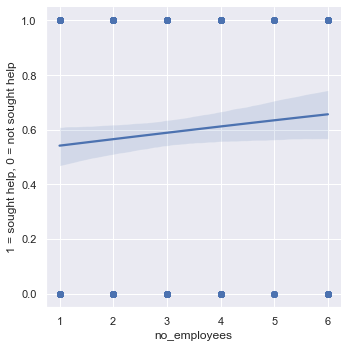

In [ ]:
sns.lmplot(x="no_employees", y='treatment', data=df, logistic=True) 
plt.ylabel('1 = sought help, 0 = not sought help') 
plt.show() 

1. Independence, met: this dataset is from a 2014 survey, so it is a random sample from the whole population of all US employees in Tech field, besides, n (426) < 10%N (all US employees in Tech field) in US;

2. Linearity Condition, met: there is small s-shape in the above figure;

3. Multicollinearity: we have only one numeric variable here (no_emplloyees), so we do not need to check this condition. 

### Let us see if this model is reasonable for use before diving into its data and drawing our conclusions.

In [ ]:
fprs, tprs, thresholds = roc_curve(y_true=df_test['treatment'], y_score=model1.predict(exog=df_test)) 
auc = roc_auc_score(y_true=df_test['treatment'], y_score=model1.predict(exog=df_test)) 
print(auc)

0.6824404761904762


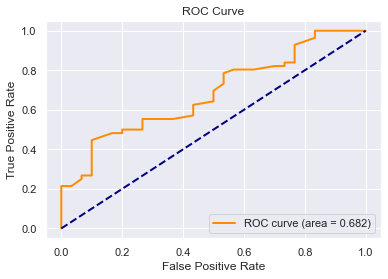

In [ ]:
def plot_roc(fpr, tpr, auc, lw=2): 
   plt.plot(fpr, tpr, color='darkorange', lw=lw, 
            label='ROC curve (area = '+str(round(auc,3))+')') 
   plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--') 
   plt.xlabel('False Positive Rate') 
   plt.ylabel('True Positive Rate') 
   plt.title('ROC Curve') 
   plt.legend(loc="lower right") 
   plt.show() 

plot_roc(fprs, tprs, auc) 

### Conclusion: 
Since the p value of benefits here (0.004) < $\alpha$ value (0.05), we would reject the H0 of that the $\beta(benefits)$ in the model 1 = 0, and conclude that there is a relationship between benefit and seeking mental health help. However, for other variables in the model, their default p values does not seem to be < $\alpha$ value (0.05). Besides, the variable with the lowest p value is leave, indicating that how easy is it for employee to take medical leave for a mental health condition could be more related to seeking mental help compared to other predictors in the mdoel.

## 2. Is there an association between gender, age, and mental health? ($\alpha$ = 0.05)

H0: $\beta(Gender)$ = $\beta(Age)$ = 0 in the model;

Ha: a least one $\beta$ != 0 in the model

### Backward Elimination:

We have only 2 predictors in our model, so we may not need to do the elimination part here, the summary table is sufficient for drawing insight.

In [ ]:
model2 = smf.logit(formula = 'treatment ~ Gender + Age', data = df_train).fit()
model2.summary()

Optimization terminated successfully.
         Current function value: 0.655791
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              treatment   No. Observations:                  340
Model:                          Logit   Df Residuals:                      337
Method:                           MLE   Df Model:                            2
Date:                Wed, 27 Apr 2022   Pseudo R-squ.:                 0.03884
Time:                        20:57:18   Log-Likelihood:                -222.97
converged:                       True   LL-Null:                       -231.98
Covariance Type:            nonrobust   LLR p-value:                 0.0001220
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -1.1809      0.588     -2.009      0.045      -2.333      -0.029
Gender[T.1]    -0.7149      0.300     -2.383      0.017      -1.303      -0.127
Age             0.0635      0.017      3.629      0.000       0.029       0.098
===============================================================================
"""

### Fitted Equation:

log($\hat{p}$/1-$\hat{p}$) = -1.1809 - 0.7149 * Gender + 0.0635 * Age

### Checking Conditions:

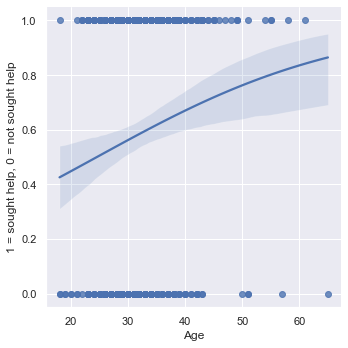

In [ ]:
sns.lmplot(x="Age", y='treatment', data=df, logistic=True) 
plt.ylabel('1 = sought help, 0 = not sought help') 
plt.show()

1. Independence, met: this dataset is from a 2014 survey, so it is a random sample from the whole population of all US employees in Tech field, besides, n (426) < 10%N (all US employees in Tech field in US);

2. Linearity Condition, met: there is obvious s-shape in the above figure;

3. Multicollinearity: we have only one numeric variable here (Age), so we do not need to check this condition. 

### Again, let us see if this model is reasonable for use before diving into its data and drawing our conclusions.

In [ ]:
fprs, tprs, thresholds = roc_curve(y_true=df_test['treatment'], y_score=model2.predict(exog=df_test)) 
auc = roc_auc_score(y_true=df_test['treatment'], y_score=model2.predict(exog=df_test)) 
print(auc)

0.6461309523809524


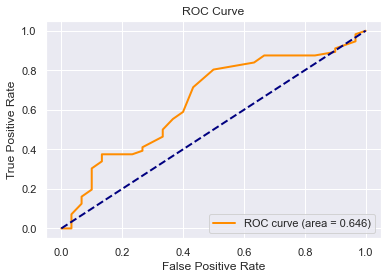

In [ ]:
def plot_roc(fpr, tpr, auc, lw=2): 
   plt.plot(fpr, tpr, color='darkorange', lw=lw, 
            label='ROC curve (area = '+str(round(auc,3))+')') 
   plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--') 
   plt.xlabel('False Positive Rate') 
   plt.ylabel('True Positive Rate') 
   plt.title('ROC Curve') 
   plt.legend(loc="lower right") 
   plt.show() 

plot_roc(fprs, tprs, auc) 

### Conclusion: 
Since the p value of Gender here (0.017) < $\alpha$ value (0.05), we would reject the H0 of that the $\beta(Gender)$ in the model 2 = 0, and conclude that there is a relationship between Gender and seeking mental health help. Similarly, for $\beta(Age)$, its p value (0.000) < $\alpha$ value (0.05), we have the same conclusion with it like Gender.